# PySCF

Autor: [Prof. Elvis do A. Soares](https://github.com/elvissoares) 

Contato: [elvis@peq.coppe.ufrj.br](mailto:elvis@peq.coppe.ufrj.br) - [Programa de Engenharia Química, PEQ/COPPE, UFRJ, Brasil](https://www.peq.coppe.ufrj.br/)

---

## Instalação 

```[bash]
pip install pyscf
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, cc

# import scienceplots
# plt.style.use(['notebook'])

## Introdução

Construindo a molécula de H2 usando base STO-3G

In [2]:
mol = gto.Mole()
mol.build(
    atom = [['H',(0, 0, 0)], ['H',(1.4, 0, 0)]],
    basis = 'sto-3g', unit='Bohr')

Resolvendo SCF

In [3]:
mf = scf.RHF(mol).run()

converged SCF energy = -1.11671432506255


Usando a base 6-31g

In [4]:
mol = gto.Mole()
mol.build(
    atom = [['H',(0, 0, 0)], ['H',(1.4, 0, 0)]],
    basis = '6-31g', unit='Bohr')

Resolvendo SCF

In [5]:
mf = scf.RHF(mol).run()

converged SCF energy = -1.12674270445179


In [6]:
mf.e_tot

np.float64(-1.1267427044517926)

Usando um método pós-HF de Coupled-Cluster (CC)

In [7]:
mol = gto.Mole()
mol.build(
    atom = [['H',(0, 0, 0)], ['H',(1.4, 0, 0)]],
    basis = 'cc-pvdz', unit='Bohr')

In [8]:
mf = scf.RHF(mol).run()

mycc = cc.CCSD(mf).run()
print('CCSD total energy', mycc.e_tot)
et = mycc.ccsd_t()
print('CCSD(T) total energy', mycc.e_tot + et)

converged SCF energy = -1.12870944897989
E(CCSD) = -1.163398738103133  E_corr = -0.03468928912324084
CCSD total energy -1.163398738103133
CCSD(T) correction = -2.14159081238312e-19
CCSD(T) total energy -1.163398738103133


## Otimizando Geometria de H2

In [9]:
mol = gto.Mole()

Rarray = np.arange(0.7, 3.0, 0.1)
Earray = np.zeros_like(Rarray)

for i, R in enumerate(Rarray):
    
    mol.build(
        atom = [['H',(0, 0, 0)], ['H',(R, 0, 0)]],
        basis = '6-31g**', unit='B', verbose=0)
    
    mf = scf.HF(mol)
    Earray[i] = mf.scf()

(0.5, 3.0)

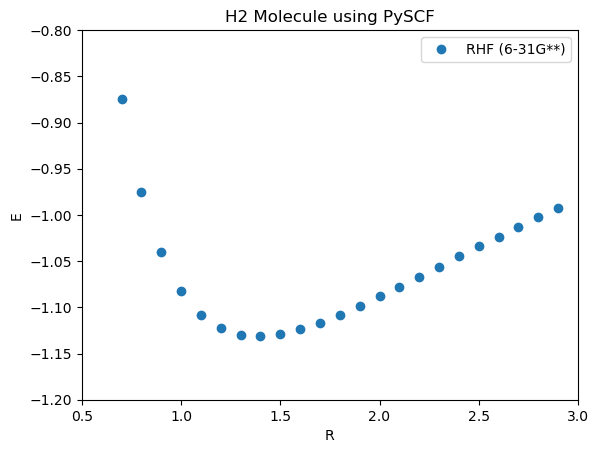

In [10]:
plt.plot(Rarray, Earray,'o', label = 'RHF (6-31G**)')
plt.legend(loc='upper right')
plt.xlabel('R')
plt.ylabel('E') 
plt.title('H2 Molecule using PySCF')

plt.ylim(-1.2,-0.8)
plt.xlim(0.5, 3.0)

Fitting da energia usando Potencial de Morse

$$ E(R) = E_0 + a (1- e^{-b(R-R_0)})^2$$

In [11]:
from scipy.optimize import curve_fit

def func(x, E0, d0, a, b):
    return  E0 + a * (1- np.exp(-b* (x-d0)))**2 

popt, pcov = curve_fit(func, Rarray , Earray , p0=[-1.0,1.4,1.0,1.0])

In [16]:
Estar = popt[0]

print(f'Equilibrium Energy: {Estar:.3f}')    
print('HF limit:', -1.134)

print(f'Relative error: {(abs(Estar +1.134) /1.134 * 100):.2f} %')

Equilibrium Energy: -1.135
HF limit: -1.134
Relative error: 0.12 %


In [ ]:
Rstar = popt[1]

print(f'Equilibrium distance: {Rstar:.3f}')    
print('Experimental value:', 1.401)

print(f'Relative error: {(abs(Rstar - 1.401) / 1.401 * 100):.2f} %')

Equilibrium distance: 1.387
Experimental value: 1.401
Relative error: 1.00 %


Text(0.5, 1.0, 'H2 Molecule using PySCF')

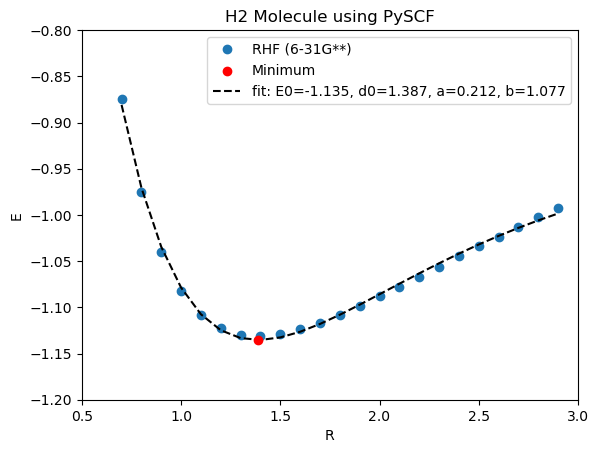

In [13]:
plt.plot(Rarray, Earray,'o', label = 'RHF (6-31G**)')
plt.scatter(Rstar, Estar, color='red', label='Minimum', zorder=5)
plt.plot(Rarray, func(Rarray, *popt), 'k--',
         label='fit: E0=%5.3f, d0=%5.3f, a=%5.3f, b=%5.3f' % tuple(popt))
plt.ylim(-1.2,-0.8)
plt.xlim(0.5, 3.0)
plt.legend(loc='upper right')
plt.xlabel('R')
plt.ylabel('E') 
plt.title('H2 Molecule using PySCF')

## H2O molecule

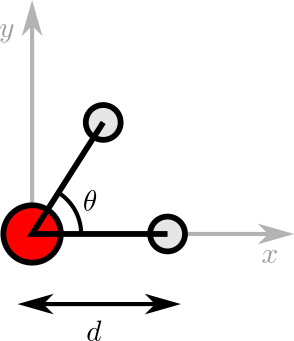

In [14]:
d0 = 1.733 # a.u (Experimental value)

theta0 = 104.5 # degrees (Experimental value)
theta0 = np.radians(theta0) # convert to radians

print('d0 =', d0, ' u.a.')
print('theta0 =', theta0, ' radians')

H2Omol = gto.Mole()
H2Omol.build(
    atom = [['O',(0, 0, 0)],['H',(d0, 0, 0)], ['H',(d0*np.cos(theta0), d0*np.sin(theta0), 0)]],
    basis = '6-31g**', unit='B', verbose=0)

d0 = 1.733  u.a.
theta0 = 1.8238690683340744  radians


Energia da molécula

In [15]:
mf = scf.HF(H2Omol)
mf.scf()

np.float64(-76.02140073437423)

Energia como função da distância de ligação $H-O$

Energia como função do ângulo de ligação $H-O-H$